# Visualising Input-output Networks Using US Data and ``NetworkX``

Author: Shu Hu

QuantEcon Lunch Talk, 5 April, 2022

This notebook visualises the input-output networks using US data and [NetworkX](https://networkx.org/).

## 1 Motivations

- A graph is more than a thousand words.
- Use network plots to understand network patterns.
    - Example: Citation or Publication Networks
        - https://scholar.google.com.au/
        - https://www.connectedpapers.com/
- Topics today: Leontielf Input-output Networks
    - target: 
        - search "Economic Networks: Theory and Computation" in google scholar or
        - click: https://scholar.google.com.au/scholar?hl=en&as_sdt=0%2C5&q=Economic+Networks%3A+Theory+and+Computation&btnG= 
    - ingredients:
       - use and make table from BEA in 2019: https://www.bea.gov/industry/input-output-accounts-data#tab-02
    - instructions:
        - step 1
        - step 2
        - step 3

## 2 Instructions

### Step 1: Construct IO Coefficient Matrix

Imports for step 1:

In [1]:
import pandas as pd

The input-output coefficient matrix (or called direct-output or Ghosh Matrix) $F = [f_{ij}]$  is defined by

$$
f_{ij} := \frac{z_{ij}}{x_i} = \text{ value of inputs from i to j per dollar output from i}
$$

where 
- $z_{ij}$ is the inter-industry sales from sector $i$ to sector $j$,
- $x_i$ is the total sales of sector $i$.

The Python dictionary below shows the IO code for industries and their names:

In [2]:
CODES = {'ag': "Agriculture, forestry, fishing, and hunting",    
         'mi': "Mining",  
         'ut': "Utilities",  
         'co': "Construction",  
         'ma': "Manufacturing",  
         'wh': "Wholesale trade",  
         're': "Retail trade", 
         'tr': "Transportation and warehousing",  
         'in': "Information",  
         'fi': "Finance, insurance, real estate, rental, and leasing",  
         'pr': "Professional and business services", 
         'ed': "Educational services, health care, and social assistance",   
         'ar': "Arts, entertainment, recreation, accommodation, and food",  
         'ot': "Other services, except government",  
         'go': "Government"}

codes = list(CODES)

In [3]:
data_file_make = 'csv_files/make_15_2019.csv'
data_file_use = 'csv_files/use_15_2019.csv'
colname = 'Total Industry Output'
columnlist = ['Name',
              'Total Intermediate',
              'Personal consumption expenditures',
              'Private fixed investment',
              'Change in private inventories',
              'Exports of goods and services',
              'Government consumption expenditures and gross investment',
              'Total use of products']
N = 15

First construct the matrix $Z=(z_{ij})$.

In [4]:
df1 = pd.read_csv(data_file_use)
df2 = df1[:N]
df3 = df2.drop(columns=columnlist)
df4 = df3.replace('...', 0)
df4

,"Agriculture, forestry, fishing, and hunting",Mining,Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services","Other services, except government",Government
0,114769,191,0,3432,322670,1774,5259,199,0,17,5402,255,10129,330,8980
1,2544,58999,40944,27940,371488,26,5,234,933,62,2038,439,1573,689,39181
2,4401,9069,22602,4753,55663,15113,33156,12237,5448,108576,16373,18894,28745,3963,26836
3,1681,3501,6840,217,14197,1983,4465,5923,2456,160480,1799,1651,2899,3498,95792
4,110824,87229,24462,592230,2458644,92558,93575,144775,120386,114226,210934,265246,147831,78423,523874
5,1486,184,1111,62,25085,44649,19245,217,2155,7402,228,360,133,22,43
6,0,0,0,0,0,0,2210,0,0,0,0,0,0,3,0
7,661,2968,10538,1153,54383,81713,76317,149148,21570,43612,64799,22669,10327,5323,49523
8,582,2180,2809,8584,22650,25313,29575,13858,237039,73613,121163,42412,22982,18944,104515
9,33682,42756,13517,56687,108329,189839,234543,138470,89086,1420134,301006,335075,160697,86867,193748


Then extract the vector $X$ and append it to the dataframe containing $Z$.

In [5]:
df5 = pd.read_csv(data_file_make)
df6 = df4
df6["Total"] = df5[colname]
X = df5[colname][:N].to_numpy()
df6 = df6.astype(float)
df6

,"Agriculture, forestry, fishing, and hunting",Mining,Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services","Other services, except government",Government,Total
0,114769.0,191.0,0.0,3432.0,322670.0,1774.0,5259.0,199.0,0.0,17.0,5402.0,255.0,10129.0,330.0,8980.0,452427.0
1,2544.0,58999.0,40944.0,27940.0,371488.0,26.0,5.0,234.0,933.0,62.0,2038.0,439.0,1573.0,689.0,39181.0,579935.0
2,4401.0,9069.0,22602.0,4753.0,55663.0,15113.0,33156.0,12237.0,5448.0,108576.0,16373.0,18894.0,28745.0,3963.0,26836.0,503226.0
3,1681.0,3501.0,6840.0,217.0,14197.0,1983.0,4465.0,5923.0,2456.0,160480.0,1799.0,1651.0,2899.0,3498.0,95792.0,1689986.0
4,110824.0,87229.0,24462.0,592230.0,2458644.0,92558.0,93575.0,144775.0,120386.0,114226.0,210934.0,265246.0,147831.0,78423.0,523874.0,6259231.0
5,1486.0,184.0,1111.0,62.0,25085.0,44649.0,19245.0,217.0,2155.0,7402.0,228.0,360.0,133.0,22.0,43.0,2091682.0
6,0.0,0.0,0.0,0.0,0.0,0.0,2210.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1954487.0
7,661.0,2968.0,10538.0,1153.0,54383.0,81713.0,76317.0,149148.0,21570.0,43612.0,64799.0,22669.0,10327.0,5323.0,49523.0,1353070.0
8,582.0,2180.0,2809.0,8584.0,22650.0,25313.0,29575.0,13858.0,237039.0,73613.0,121163.0,42412.0,22982.0,18944.0,104515.0,1941199.0
9,33682.0,42756.0,13517.0,56687.0,108329.0,189839.0,234543.0,138470.0,89086.0,1420134.0,301006.0,335075.0,160697.0,86867.0,193748.0,7293149.0


Finally construct the matrix $F$ using $Z$ and $X$.

In [6]:
df7 = df6.iloc[:,:].div(df6.Total, axis=0)
F = df7.iloc[:, :N].to_numpy()
df7

,"Agriculture, forestry, fishing, and hunting",Mining,Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services","Other services, except government",Government,Total
0,0.253674,0.000422,0.000000,0.007586,0.713198,0.003921,0.011624,0.000440,0.000000,0.000038,0.011940,0.000564,0.022388,0.000729,0.019849,1.0
1,0.004387,0.101734,0.070601,0.048178,0.640568,0.000045,0.000009,0.000403,0.001609,0.000107,0.003514,0.000757,0.002712,0.001188,0.067561,1.0
2,0.008746,0.018022,0.044914,0.009445,0.110612,0.030032,0.065887,0.024317,0.010826,0.215760,0.032536,0.037546,0.057121,0.007875,0.053328,1.0
3,0.000995,0.002072,0.004047,0.000128,0.008401,0.001173,0.002642,0.003505,0.001453,0.094959,0.001065,0.000977,0.001715,0.002070,0.056682,1.0
4,0.017706,0.013936,0.003908,0.094617,0.392803,0.014787,0.014950,0.023130,0.019233,0.018249,0.033700,0.042377,0.023618,0.012529,0.083696,1.0
5,0.000710,0.000088,0.000531,0.000030,0.011993,0.021346,0.009201,0.000104,0.001030,0.003539,0.000109,0.000172,0.000064,0.000011,0.000021,1.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,1.0
7,0.000489,0.002194,0.007788,0.000852,0.040192,0.060391,0.056403,0.110229,0.015942,0.032232,0.047890,0.016754,0.007632,0.003934,0.036600,1.0
8,0.000300,0.001123,0.001447,0.004422,0.011668,0.013040,0.015235,0.007139,0.122110,0.037921,0.062417,0.021848,0.011839,0.009759,0.053840,1.0
9,0.004618,0.005862,0.001853,0.007773,0.014854,0.026030,0.032159,0.018986,0.012215,0.194722,0.041272,0.045944,0.022034,0.011911,0.026566,1.0


### Step 2: Generating Colorcode

Imports for step 2:

In [7]:
import numpy as np
import matplotlib.cm as cm           # import colormap stuff!

Define some functions.

In [8]:
def katz_centrality(A, b=1, authority=False):
    """
    Computes the Katz centrality of A, defined as the x solving

    x = 1 + b A x    (1 = vector of ones)

    Assumes that A is square.

    If authority=True, then A is replaced by its transpose.
    """
    n = len(A)
    I = np.identity(n)
    C = I - b * A.T if authority else I - b * A
    return np.linalg.solve(C, np.ones(n))

In [9]:
def to_zero_one(x):
    "Map vector x to the zero one interval."
    x_min, x_max = x.min(), x.max()
    return (x - x_min)/(x_max - x_min)

Calculuate the katz centrality for the networks and use that measure to generate the colorcode.

In [10]:
upstreamness = katz_centrality(F)
upstreamness_color_list = cm.plasma(to_zero_one(upstreamness))

### Step 3: Visualising the Networks

Imports for step 3:

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as plc

Store the network information using ``NetworkX``.

In [12]:
N = len(F)
layout_type = 'spring' # alternative layouts: spring, circular, random, spiral
layout_seed = 5432167
tol = 0.0
node_color_list = upstreamness_color_list
node_size_multiple = 0.0005
edge_size_multiple = 14

In [17]:
G = nx.DiGraph()

# Add nodes and their labels, with weights by sales of the sector
for i, w in enumerate(X):
    G.add_node(codes[i], weight=w, name=codes[i])

# Scale the node size
node_sizes = X * node_size_multiple 

# Choose spring layout, alternatives: spring, circular, random, spiral
node_pos_dict = nx.spring_layout(G, seed=layout_seed) 

# Add the edges, along with their colors and widths
edge_colors = []
edge_widths = []
for i in range(N):
    for j in range(N):
        a = F[i, j]
        if a > tol:
            G.add_edge(codes[i], codes[j])
            edge_colors.append(node_color_list[i])
            width = a * edge_size_multiple
            edge_widths.append(width)
            
G.remove_edges_from(nx.selfloop_edges(G))

Plot the networks.

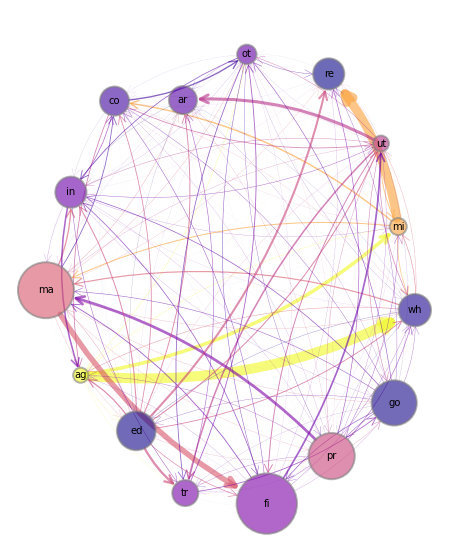

In [18]:
fig, ax = plt.subplots(figsize=(8, 10))
plt.axis("off")

nx.draw_networkx_nodes(G, 
                       node_pos_dict, 
                       node_color=node_color_list, 
                       node_size=node_sizes, 
                       edgecolors='grey', 
                       linewidths=2, 
                       alpha=0.6, 
                       ax=ax)

nx.draw_networkx_labels(G, 
                        node_pos_dict, 
                        font_size=10, 
                        ax=ax)

nx.draw_networkx_edges(G, 
                       node_pos_dict, 
                       edge_color=edge_colors, 
                       width=edge_widths, 
                       arrows=True, 
                       arrowsize=20, 
                       alpha=0.6,  
                       ax=ax, 
                       arrowstyle='->', 
                       node_size=node_sizes, 
                       connectionstyle='arc3,rad=0.15')


# plt.savefig(file_name)
plt.show()